# 実装演習レポート１：機械学習
###機械学習とは：　

*   タスク（T)を性能指標（P)で測定し、その性能が経験（E, i.e., データ) により改善されるとする。 このような場合、コンピュータプログラムはT及びPに関してEから学習するといわれている。

*   機械学習プログラムは数学的な理論に基づいたアルゴリズムで書かれた"学習する方法"である


> **説明変数**  $x$ : 入力値  m個の特徴値を持つm次元ベクトル 


> **目的変数**  $y$ : 出力値  スカラー値

> **説明委変数パラメータ (重み)**　$w$ : 特徴量 $x$ が予想値 $\hat y$に対してどのような影響を与えるかを決定する重みの集合

> **データ** (X, Y)=$((x_i, y_i), i = 1,...,n))$： nはデータの個数、$x_i$はi番目の入力値

> **予測値** $\hat y$


# １. 回帰問題 (Regression)

> **ある入力 X(連続値、離散値）から連続値Y を予測する問題**

>  データに出力値がある場合に回帰問題を解くために使われる**教師あり学習**の一つ


##  1.1. 線形回帰モデル

m次元特徴値を持つの入力データ**ｘ**とパラメーター**ｗ**の線形結合（入力とパラメーターの内積）で表されるモデル

### 1.1.1 パラメーターと推定方法

> * 最小二乗法　:　平均二乗誤差（MSE)を最小化させるようなパラメータを探す方法

> * 切片とは$x=0$のときの$y$の値　（y軸との交点）

> * 平均二乗誤差（MSE）：　$y$と$\hat{y}$の差を二乗したものの和

> * 最尤法（Maximum likelihood) による回帰係数の推定

> * 線形回帰の場合は最尤法と最小二乗法の回帰係数の推定は一致するが、線形回帰では最小二乗法を使って回帰係数の推定

### 1.1.2 単回帰モデル

> 説明変数が一次元　（ｍ＝１）

> 直線で表される

### 1.1.3 重回帰モデル

> 説明変数が二次元以上　（ｍ＞１）

> ２次元の特徴値では平面で表される

## 1.2 データの分割
### 目的

* **モデルの汎化性能を測る**ことによって未知のデータの予測の精度を上げる

### 分割方法

* 有限のデータをｋ個に分割し、そのうちの1つをテスト用(Test data)として、残りのk-1個のデータを学習用(Training data)とする 
* 学習データを使ってモデルを作り、テストデータでモデルの精度を測る



## 1.3 非線形回帰分析

> 非線形構造を内在する現象に対して非線形回帰モデルで表現

> **基底展開法** といって、**基底関数**$\phi$ と 呼ばれる既知の非線形関数とパラメータベクトルの線形結合を使用


*   非線形関数ベクトル : $\phi (x_i) = (\phi _1 (x _1),\phi _2 (x _i), ..., \phi _k (x _i) )^T、k=基底関数の数$
*   非線形関数の計画行列 :　$\Phi ^{(train)} = (\phi (x _1),\phi (x _2), ..., \phi (x _n) )^T, \in R ^{(n \times k)}$
* $\hat y_i = w_0 + \Sigma w_j \phi _j (x_i) + \epsilon _i$

>最小二乗法や最尤法でパラメーターを推定

ベクター表記も線形回帰と同じ枠組みで

### 1.3.1 よく使われる基底関数

> 多項式

> ガウス　：　形だけ正規分布のpdfと同じだが、pdfではないので総積は１になる必要はない

> spline/B-Spline

### 1.3.2 未学習(Underfitting)と過学習(overfitting)

未学習:　学習データに対して十分小さな誤差が得られないモデル
>　表現力がより高いモデルを利用 


**過学習**:　小さな誤差はえられたが、学習誤差と検証誤差との差が大きいモデル

> * 学習データの数を増やす　

> * 不要な既定関数(変数）を削除して表現力を抑止　：　基底関数の数、位置、バンド幅によりモデルのコンプレキシティーが変化。適切な既定関数を用意

> * **正則化法**　ペナルティを課して表現力を抑止


## 1.4 正則化法(Regularization)（罰則化法）

モデルの複雑さに伴って、その値が大きくなる正則化項(Penalty)を課した関数を最小化

### 1.4.1 正則化項(罰則項）

*　Lasso L1ノルムを利用　:　スパース推定　(いくつかのパラメーターを正確に０に推定することによって、推定する段階で不要な変数やパラメータを排除できる）

*　Ridge L2ノルムを利用　:　縮小推定　　（パラメーターを０に近づけるよう推定）

### 1.4.2 正則化パラメータ　$\gamma$

*　**モデルの曲線の滑らかさを調節**

*　$\gamma$ 小さく　→　制約面が大きく

*　$\gamma$ 大きく　→　制約面が小さく



## 1.5　汎化性能
学習誤差ではなくテスト誤差（汎化誤差）が小さいものが良い性能を持ったモデル

>テスト誤差 は検証データでの性能を測ることで推定

### **ホールドアウト法**:　ｋ個に分けたデータの一つをテスト用、残りを学習用に2分割
* 学習用データを多くすれば学習制度はよくなるが性能評価の精度は悪くなる
* テストデータを多くすれば学習の精度が悪くなる
* 大きなデータ以外には良い性能評価を与えない

### **クロスバリデーション**:
K個に分けたデータの一つをテストデータとする。残りのデータで学習する。これをｋ回繰り返す

#### **CV値**：ｋ回のモデリングで得られた精度の平均値

### **グリッドサーチ**

* すべてのチューニングパラメータの組みあ合わせで評価値を算出

* 最も良い評価値を持つチューニングパラメータを持つ組み合わせをいいモデルのパラメータとして採用

### **バイアス・バリアンス分解**

> 損失関数の期待値はバリアンス、バイアスの2乗、ノイズに分解できる。

$E_D [L(y(x;D),t)]$

$=E_D [((y(x;D)−E_D[y(x;D))] ^2] $  (バリアンス)

$+E_D [{E_D|y(x;D)]−E[t|x;D]}^2]$　(バイアスの（二乗）)

$+E_D[(E[t|x;D]−t)^2]$　(ノイズ)

に分解できる。損失関数を０として最小化するとき、以下のことが生じる。

#### **バリアンス**：

* モデル$y(x;D)$ による予測が、訓練データ集合によって変動する度合いの期待値を表しており、**訓練データに依存しすぎることで新しいデータへの予測が悪化する度合い**を表している

#### **バイアス**：　

* 損失の期待値を最小化する$E[t|x;D]$からずれる度合いの期待値を表しており、**モデルが単純であるあまりに学習がうまくいかない度合い**を表している

#### **バイアスとバリアンスのトレードオフ**

> バイアスとバリアンスはトレードオフの関係にあり、正則化によって過学習制御をおこなった場合の関係はバリアンスが下がるとバイアスが大きくなる。以下。

>  *　過学習制御を小さくしておけば、訓練データに対してはフィットするためのバイアスは小さくなる。一方でデータに依存しすぎたあまりに生じるバリアンスは大きくなる

>  *　過学習制御を大きくすれば、訓練データへの依存度であるバリアンスは小さくなるが、訓練データにすらフィッティングできなくなりバイアスが上昇する

**損失の期待値を最小化するには、バリアンスとバイアスが両方共なるべく低い位置で正則化を決めることで。新規データに対する誤差も小さくなりうる**

# 2．分類問題　(Classification)

ある入力からクラスに分類する問題で教師あり学習の一つ





##2.1 　ロジスティクス回帰モデル

*　実数の値を持つ入力値$x$とm次元のパラメータの線形結合をシグモイド関数に入力

モデルは下記の数式で表される：

$$P(Y=1|x) = \sigma(w_0 + w_1 x_1 + w_2 x_2+...+w_m x_m)$$

For ith obs $x_i$ 

$$p_i = \sigma (w_0 + w_1 x_{i1} + w_2 X_{i2} + ... + w_m x_{im})$$

where $i=1,...,n$


$\sigma (h)$ は　シグモイド関数：
　
$\sigma (h) = \frac{1}{1+exp(-h)}$　

*　出力は$y=1$になる0～1の間の確率の値になるので、0.5以上ならばY=1、未満なら０と予測


## 2.2　シグモイド関数の性質

* シグモイド関数の微分はシグモイド関数地震で表現可能であり、尤度関数の微分でパラメーターの最適化を図るとき計算が用意 


シグモイド関数の特徴としてどのような値を入れても出力は０～１の間になる




## 2.3 ロジスティクス回帰の最尤推定法

* $Y$ が１か０を取る確率はベルヌーイ分布によってあらわせれるので、ロジスティクス回帰モデルはベルヌーイ分布を取ると考えられる。　よって、最尤法で既存のデータが最もよく現れる確率を与えるパラメーターを推定することができる。

* 便宜上、尤度関数でlogをとり、マイナスをかけたものを最小化する点、すなわち０の点を見つける。


## 2.4 勾配降下法で最尤推定法のimplementation:　
実際はロジスティクス回帰モデルにおいて、解析的にこの値を求めることは困難なのであるので、**勾配降下法**で推定する。　勾配降下法とはより小さな傾きを見つけながら傾き０を探していくという反復学習法である。

目的関数をそれぞれのパラメータで偏微分して学習率$\eta$とかけたものをそれぞれのパラメーターから引いて、パラメータの更新をする。

$$w^{k+1} = w^k - \eta \frac{\partial E(w)}{\partial w}$$

### 色々な勾配降下法

1.   標準勾配降下法　

ロジスティック回帰の標準降下法によるパラメータ更新の式は：
$w^{(k+1)} = w^{(k)} + \eta \Sigma_{i=1}^n (y_i - p_i) x_i$

> Pros: 絶対に収束する

> Cons: パラメータ更新にN個すべてのデータを使うことによりNが巨大になった時に計算時間が膨大になり膨大なメモリが必要

2.   確率的勾配降下法　（SGD)

ロジスティック回帰の確率勾配降下法によるパラメータの更新式:　
$w^{(k+1)} = w^{(k)} + \eta　(y_i - p_i) x_i$

> データをひとつずつランダムに選んでパラメータを更新

> データが大きい時には非常に便利



## 2.5 分類モデルの評価方法

コロナのPCR検査の例

Confusion Matrix

TP = True Postitive (PCR陽性、実際はコロナにかかっている）

FP = False Positive (PCR陽性、実際はコロナにかかっていない)

TN = True Negative (PCR陰性、実際はコロナにかかっていない)

FN = False Negative (PCR陰性、実際はコロナにかかっている)

**正解率**：　$\frac{TP＋TN}{TP+FP+TN+FN}$

問題点：　分類したいクラスには偏りがある場合、単純な正解率はあまり意味をなさない


**再現率　Recall**:  $\frac{TP}{TP+ FN}$　本当にPositive の物の中からPositiveと予測できる割合 

偽陽性が多少多くても抜け漏れは少ない予測をしたい場合に利用　（コロナの検査）

**適合性　Precision**:　$\frac{TP}{TP+FP}$ モデルがポジティブとした物のなかで本当にPositiveである割合。見逃し（FN)が多くてもより正確な予測をしたい際に利用

**F-score**： RecallとPrecisionのはトレードオフの関係にあり、これらのバランスを示しているのがF-score。高ければ高いほどRecallとPrecisionがともに高くなる


## 2.6 KNN

分類のための教師あり学習

$x_i$から最も近いｋ個データを取ってきて、多数決Votingでもっとも多くのクラスラベルに$x_i$を分類

* ｋの値で結果も変わる

* ｋを大きくすると決定境界は滑らかになる



## 2.7 SVM



# 3. K-means

クラスタリング

教師無し学習の一つ

データをｋ個のクラスタに特徴のにているもの同士のクラスタに分類する方法

1. ｋをとりあえず決定

2. 各クラスの初期値を設定

3. 各データ点に対して、各クラスタ中心との距離を計算し最も近いクラスタを割り当てる

4. 各クラスタの平均ベクトルを計算し、更新する

5. 収束するまで（動かなくなるまで）３，４を繰り返す

問題点：　初期値を変えると結果も変わりうる
収束点が最適とはわからない
クラスタの数ｋを決めるのが結構大変



# 4. 主成分分析　（Principal component analysis)

（変換したときに情報の損失がないように圧縮）

**多変量データの次元を減らし小数個の指標に圧縮**

* 次元を減らすことに伴う情報量の損失はなるべく小さくしたい

* 少数変数をりようした分析や可視化が実現可能

* 情報の量を分散の大きさと捉える

* 線形変換後の変数の分散が最大となる射影軸を探索



## 4.1 主成分の求め方
データ行列: X¯=(x1−x¯,...,xn−x¯)T∈Rn×m 

線形変換後のベクトル:　 sj=(s1j,...,snj)T=X¯aj,   aj∈Rm , and j=jth pC

線形変換後の分散:　 Var(sj)=1nsTjsj=1n(X¯aj)T(X¯aj)=1najX¯X¯aj=aTjVar(X¯)aj 

ノルムが１となる制約を入れて無限解を避けながら最適化問題を解く

目的関数： argmaxaaTjVar(X¯)aj,   a∈Rm 

制約条件： aTjaj=1 

制約付き最適化問題の解き方

-> ラグランジュ関数を最大にする係数ベクトルを探索(微分して０になる点）

ラグランジュ関数：　 E(aj)=aTjVar(X¯)aj−λ(aTjaj−1) 

∂E(aj)∂aj)=2Var(X¯)aj−2λaj=0 

Var(X¯)aj=λaj 

これは固有値を固有ベクトルを求めるときと同じ形

よって、係数 aj は X¯ の固有ベクトルと同じであり、 λ はそれに対応する固有値である

## 4.2寄与率

次元削減により失った情報量

m次元のデータをm次元の主成分で表皮したとき、固有値の和と元のデータの分散が一致: $V _{total} = {\sum _{i=1} ^m \lambda _i }$

第ｋ主成分の分散は主成分に対応する固有値: $\lambda _k$

**寄与率**：　$c_k = \frac{\lambda _k}{\sum _{i=1} ^m \lambda _i }$
全体のなかでｋ次元軸が持っている情報量

**累積寄与率**: $r_k = \frac{\sum _{j=1} ^{k} \lambda _k}{\sum _{i=1} ^m \lambda _i }$
上記のｋだけでつかうことはない。１からｋまでの軸をすべて使うことになるので、累積寄与率が大切

１～ｋ次元軸でどれぐらいの情報量が含まれているか考えることが大切




# 5. ハンズオン

## 5.1 線形回帰モデル

住宅価格予測　Boston Hausing Data

In [85]:
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np

In [86]:
# load data into boston
boston = load_boston()

In [87]:
# check data
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [88]:
# full description of boston data
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [89]:
# check column names
print(boston["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [90]:
# data変数（説明変数）
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [91]:
# target変数（目的変数）
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Pandasでデータフレームの作成


In [92]:
# transforming feature data into data frame
df = DataFrame( data = boston.data, columns = boston.feature_names)

In [93]:
# adding target to the df
df['Price'] = np.array(boston.target)

In [94]:
# showing the first 5 lines of df
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 線形単回帰モデル

In [95]:
# カラムを指定してデータを表示
df[['RM']].head(4)

,RM
0,6.575
1,6.421
2,7.185
3,6.998


In [96]:
# ＲＭを説明変数として使用するためにデータフレームからスライシングしてdataという名前のリストに数値だけ入れる
data = df.loc[:,['RM']].values
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [97]:
# 目的変数
target = df.loc[:,'Price'].values
target[1:5]

array([21.6, 34.7, 33.4, 36.2])

In [98]:
# sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

In [99]:
# オブジェクト生成
model = LinearRegression()

In [100]:
# learn parameter with fit
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# predicted price for RM = 7
model.predict([[7]])

array([29.04414209])

In [102]:
# estimated parameters
print(model.coef_, model.intercept_)

[9.10210898] -34.67062077643857


### 重回帰モデル　（2変数）

In [103]:
# show columns 'CRIM' and 'RM'
df[['CRIM','RM']].head

<bound method NDFrame.head of         CRIM     RM
0    0.00632  6.575
1    0.02731  6.421
2    0.02729  7.185
3    0.03237  6.998
4    0.06905  7.147
..       ...    ...
501  0.06263  6.593
502  0.04527  6.120
503  0.06076  6.976
504  0.10959  6.794
505  0.04741  6.030

[506 rows x 2 columns]>

In [104]:
# feature vectors
data2 = df.loc[:,['CRIM','RM']].values
# target vector
target2 = df.loc[:, 'Price'].values

In [105]:
# オブジェクト生成
model2 = LinearRegression()

In [106]:
# parameter estimation with fit
model2.fit(data2, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
# predict Y for CRIM = 0.2 and RM = 7
model2.predict([[0.2, 7]])

array([29.43977562])

回帰係数と切片の値を確認

In [108]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片: %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片: -34.671


単回帰モデルの推定回帰係数は部屋の数にかかる重みで、推定直線の傾きである。正の傾きなので、部屋の数が増えるほど価格も上がるといえる

In [109]:
# 重回帰の回帰係数と切片を出力
print(model2.coef_)
print(model2.intercept_)

[-0.26491325  8.39106825]
-29.24471945192992


重回帰モデルの特徴値１は犯罪率で特徴値２が部屋数であるので、推定されたそれぞれの係数（重み）をみると、犯罪率係数は負で部屋数係数が正であるのがわかる。よって、犯罪率が増えれば価格は下がり、部屋数が増えれば価格が上がることがわかる。

### モデルの検証

ホールドアウト法で単回帰モデルの検証

1．決定係数

In [110]:
print('単回帰決定係数: %.3f, 重回帰決定係数: %.3f' % (model.score(data,target), model2.score(data2, target2)))

単回帰決定係数: 0.484, 重回帰決定係数: 0.542


In [111]:
def testingModel(data, target, test_size=0.3, modelname=model):
  
  from sklearn.model_selection import train_test_split
  
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, random_state = 666)
  # learning model with train data
  modelname.fit(X_train, y_train)
  # predict with test data
  y_train_pred = modelname.predict(X_train)
  y_test_pred = modelname.predict(X_test)
  
  # matplotlib をインポート
  import matplotlib.pyplot as plt
  plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
  plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker= 's', label = 'Test Data')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')

  # 凡例を右下に表示
  plt.legend(loc = 'lower right')

  # y=0 に直線を引く
  plt.hlines( y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
  plt.xlim({10,50})
  plt.show()

  # MSEを評価するためのメソッドを呼び出す
  from sklearn.metrics import mean_squared_error
  # Train and Test データに関してMSEを出力
  print('MSE Train: %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

  # Train and Test データに関してR^2を出力
  if data.shape[1]==1:
    print('R^2 Train: %.3f, Test: %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))


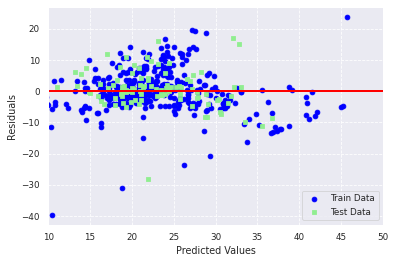

MSE Train: 43.325, Test : 44.766
R^2 Train: 0.502, Test: 0.397


In [112]:
testingModel(data, target, 0.2, model)

部屋数と価格の間に低い相関関係がみられ、エラー値も高い


## ホールドアウト法で重回帰モデルの検証


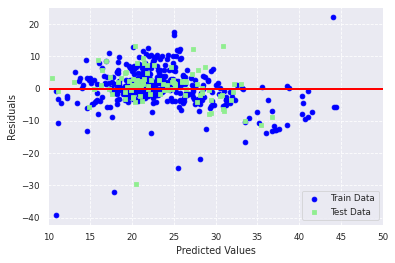

MSE Train: 38.686, Test : 38.706


In [113]:
testingModel(data2, target2, 0.2, model2)

単回帰に比べ若干MSEが下がったが、十分低いとは言えない水準

## 5.2 非線形回帰モデル

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# setting seaborn
sns.set()
# change background
sns.set_style("darkgrid",{'grid.linestyle': '--'})
# change scale
sns.set_context("paper")

In [116]:
n = 100

#真の関数
def true_func(x):
  return 1 - 48 * x + 218 * x**2 - 315 * x**3 + 145 * x**4

def linear_func(x):
  return x


In [117]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# Add noise
noise = 0.5 * np.random.randn(n)
target = target + noise


No handles with labels found to put in legend.


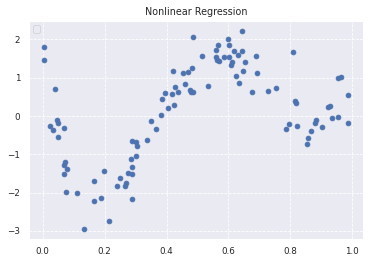

In [118]:
# Plot data with noise
plt.scatter(data, target)
plt.title('Nonlinear Regression')
plt.legend(loc = 2)

### 単回帰モデルで推定

In [119]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
#　1次線形回帰モデル作成
clf.fit(data, target)
# このモデルパラメータを使ってYハットを計算
p_lin = clf.predict(data)

0.20714280627555806


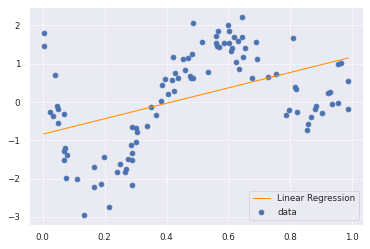

In [120]:
# データにYの推定値をPlot
plt.scatter(data, target, label = 'data')
plt.plot(data, p_lin, color = 'darkorange', marker = '', linestyle = '-', linewidth = 1, markersize=6, label='Linear Regression')
plt.legend()
print(clf.score(data, target))

一次線形回帰モデルでは多項式で作ったデータは推定しにくいことがわかる

$R^2$ は0.32と若干の相関関係を示しているのは、おそらく緩やかな上昇傾向を反映しているものとおもわれる。　

### 基底関数ガウスを使って非線形回帰モデリング

In [121]:
from sklearn.kernel_ridge import KernelRidge

In [122]:
clf = KernelRidge(alpha=.0001, kernel='rbf')
# パラメーター推定
clf.fit(data, target)
# 出力推定
p_kridge = clf.predict(data)

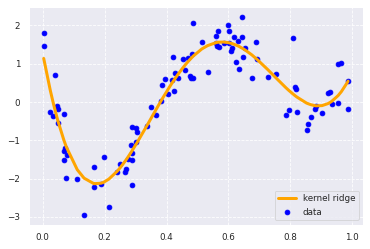

In [123]:
#　出力描写
plt.scatter(data, target, color='blue', label = 'data')
plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()

R2 = target-p_kridge

In [124]:
MSE = np.sqrt((target-p_kridge).T.dot((target-p_kridge)))
print(MSE)

[[4.33872337]]


考察:　正則化パラメータ（alpha)の値はディフォルトで１に設定されているが、それでは強すぎてモデルのコンプレキシティーがほぼ消されてしまってこの問題がうまく表現できなかった。反対に０に近づくほど過学習問題がほぼ改善されない状態になるので、その間を何度か試してみた。


### 基底関数にガウスをつかって、Ridge 正則化法で過学習をコントロールするモデルで推定

* Overfittingをコントロールするためのペナルティーをかす

In [125]:
# Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

# 基底関数で入力値を変換　バンド幅10
kx = rbf_kernel(X=data, Y=data, gamma=10)

# オブジェクト作成 正則化係数0.01
clf = Ridge(alpha=0.01)
# モデルを学習
clf.fit(kx, target)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
# 学習したモデルで出力を推定
p_ridge = clf.predict(kx)

0.8804647809760602


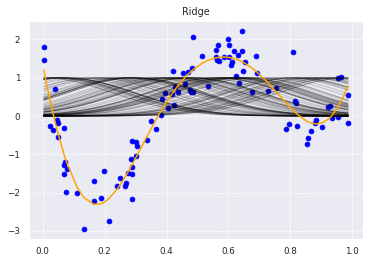

In [127]:
plt.scatter(data, target, color='blue', label='data')
for i in range(len(kx)):
  plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_ridge, color='orange', linestyle='-', linewidth= 1.5, markersize=3, label='Ridge Regression')
plt.title('Ridge')
print(clf.score(kx, target))

### 基底関数にガウスをつかって、Lasso 正則化法で過学習をコントロールするモデルで推定


In [128]:
# Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

#モジュール生成　正則化係数0.01
lasso_clf = Lasso(alpha=0.01, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10090827941894531, tolerance: 0.015484344214200974
  positive)


0.8252256128777367


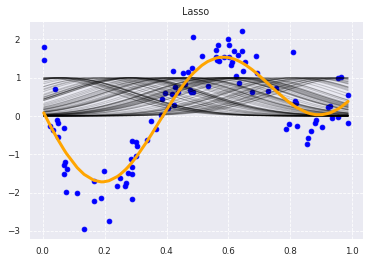

In [129]:
plt.scatter(data, target, color='blue', label='data')
for i in range(len(kx)):
  plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_lasso, color='orange', linestyle='-', linewidth=3, markersize=3)
plt.title('Lasso')

print(lasso_clf.score(kx, target))

### 多項式回帰の次元を変えてモデリング

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

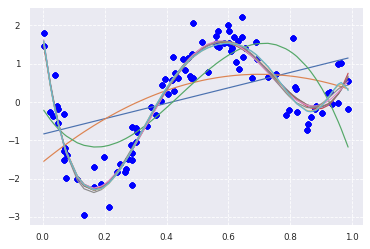

In [131]:
#PolynomialFeatures(degree=1)

# 1次元から10次元まで
deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data', color='blue')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

### SVR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


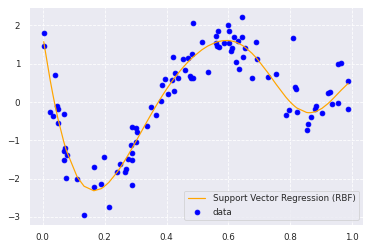

In [132]:
from sklearn import model_selection, preprocessing, linear_model, svm

#モジュール生成　SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=10, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='blue', label='data')
plt.plot(data, y_rbf, color='orange', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()


## 5.3 ロジスティクス回帰


## データ下処理、欠損値補填と性別カテゴリーを数値化

In [133]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [290]:
titanic_df = pd.read_csv('/content/drive/My Drive/Pythonライブラリ基礎講座/study_ai_ml/data/titanic_train.csv')
col_names = list(titanic_df.columns)

In [135]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
#　今回使わない特徴値を削除
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [137]:
titanic_df.head(9)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S


In [245]:
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agefill,Gender
5,0,3,male,NaN,0,0,8.4583,Q,26.507589,1
17,1,2,male,NaN,0,0,13.0000,S,30.740707,1
19,1,3,female,NaN,0,0,7.2250,C,21.750000,0
26,0,3,male,NaN,0,0,7.2250,C,26.507589,1
28,1,3,female,NaN,0,0,7.8792,Q,21.750000,0
29,0,3,male,NaN,0,0,7.8958,S,26.507589,1
31,1,1,female,NaN,1,0,146.5208,C,34.611765,0
32,1,3,female,NaN,0,0,7.7500,Q,21.750000,0
36,1,3,male,NaN,0,0,7.2292,C,26.507589,1
42,0,3,male,NaN,0,0,7.8958,C,26.507589,1


In [292]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [207]:
# 各カラムに欠損値がいくつあるかチェック
titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Agefill     177
Gender        0
dtype: int64

In [234]:
cls_gender_age = titanic_df.pivot_table(values='Age', index = 'Pclass', columns='Gender', aggfunc=np.mean)

In [236]:
cls_gender_age[0]
print(cls_gender_age)
print(cls_gender_age[1][2])


Gender          0          1
Pclass                      
1       34.611765  41.281386
2       28.722973  30.740707
3       21.750000  26.507589
30.74070707070707


In [293]:
age_missing_id = titanic_df[titanic_df['Age'].isna()].index.values
titanic_df['Agefill'] = titanic_df['Age']

In [294]:
for index_age in age_missing_id:
  pclass = int(titanic_df.Pclass[[index_age]])
  sex = int(titanic_df.Gender[[index_age]])
  titanic_df.Agefill[[index_age]] = cls_gender_age[sex][pclass]
  #print(pclass, '   ', sex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## ロジスティック回帰実装 1：
#### チケット価格から生死を判別


In [246]:
# 説明変数として使う運賃だけのリストを作成
data1 = titanic_df.loc[:, ['Fare']].values

In [250]:
# 目的変数（ターゲット）として使う生死フラグのみのリストを作成
label1 = titanic_df.loc[:, ['Survived']].values

In [251]:
from sklearn.linear_model import LogisticRegression

In [255]:
# ロジスティクス回帰モデルモジュール生成 
model = LogisticRegression()

In [256]:
# モデル学習
model.fit(data1, label1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
# チケット価格100ポンドでの生死推定： [y=0 死亡の確率、y=1 生存の確率]
# 　生存判定
model.predict_proba([[100]])

array([[0.35931275, 0.64068725]])

In [268]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [269]:
X_test_value = model.decision_function(data1)
X_test_prob = sigmoid(X_test_value)

In [272]:
print(model.intercept_)
print(model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


Text(0, 0.5, 'Prob of Survival')

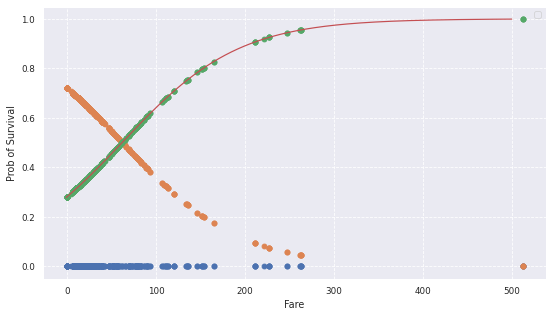

In [282]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize = (9, 5))
plt.legend()

plt.plot(data1, np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')

plt.xlabel('Fare')
plt.ylabel('Prob of Survival')

## ロジスティック回帰実装 2:　

2変数性別とクラスで生死判別

In [299]:
titanic_df = pd.read_csv('/content/drive/My Drive/Pythonライブラリ基礎講座/study_ai_ml/data/titanic_train.csv')
col_names = list(titanic_df.columns)
#　今回使わない特徴値を削除
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
cls_gender_age = titanic_df.pivot_table(values='Age', index = 'Pclass', columns='Gender', aggfunc=np.mean)

age_missing_id = titanic_df[titanic_df['Age'].isna()].index.values
titanic_df['AgeFill'] = titanic_df['Age']

for index_age in age_missing_id:
  pclass = int(titanic_df.Pclass[[index_age]])
  sex = int(titanic_df.Gender[[index_age]])
  titanic_df.AgeFill[[index_age]] = cls_gender_age[sex][pclass]
  #print(pclass, '   ', sex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [300]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,AgeFill
0,0,3,male,22.0,1,0,7.2500,S,1,22.0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0
2,1,3,female,26.0,0,0,7.9250,S,0,26.0


In [301]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']

In [302]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,AgeFill,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,1,22.0,4
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,3
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,1
4,0,3,male,35.0,0,0,8.0500,S,1,35.0,4


In [303]:
titanic_df = titanic_df.drop(['Pclass','Sex', 'Gender','Age'], axis = 1)

In [304]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,22.0,1,0,7.2500,S,22.0,4
1,1,38.0,1,0,71.2833,C,38.0,1
2,1,26.0,0,0,7.9250,S,26.0,3
3,1,35.0,1,0,53.1000,S,35.0,1
4,0,35.0,0,0,8.0500,S,35.0,4


In [ ]:
# 重要
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2

# 境界線プロット
# plt.plot([-2,2], map(lambda x: (-w_1 *x -w_0)/w_2, [-2,2]))


# # データを重ねる
# plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
# plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
# plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

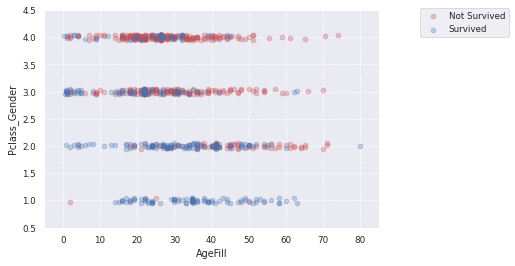

In [315]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [316]:
#　説明変数を抽出、リスト作成
data2 = titanic_df.loc[:, ['AgeFill', 'Pclass_Gender']].values

In [317]:
data2

array([[22.  ,  4.  ],
       [38.  ,  1.  ],
       [26.  ,  3.  ],
       ...,
       [21.75,  3.  ],
       [26.  ,  2.  ],
       [32.  ,  4.  ]])

In [319]:
label2 = titanic_df.loc[:,['Survived']].values

In [320]:
model2 =LogisticRegression()

In [321]:
model2.fit(data2, label2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
model2.predict([[10,1]])

array([1])

In [323]:
model2.predict_proba([[10,1]])

array([[0.02738008, 0.97261992]])

In [325]:
titanic_df.head(3)

,Survived,Age,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,22.0,1,0,7.2500,S,22.0,4
1,1,38.0,1,0,71.2833,C,38.0,1
2,1,26.0,0,0,7.9250,S,26.0,3


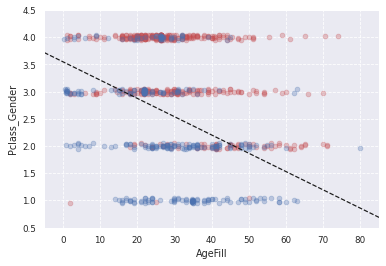

In [327]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

## モデル評価

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, train_size=0.2)
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, train_size=0.2)

In [331]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
print(traindata.shape)
print(trainlabel.shape)

(712, 8)
(712, 1)


In [332]:
eval_model1 = LogisticRegression()
eval_model2 = LogisticRegression()


In [334]:
predictor_eval1 = eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2 = eval_model2.fit(traindata2, trainlabel2).predict(testdata2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [335]:
eval_model1.score(traindata1, trainlabel1)

0.6292134831460674

In [337]:
eval_model1.score(testdata1, testlabel1)

0.6718092566619915

In [339]:
eval_model2.score(traindata2, trainlabel2)

0.7640449438202247

In [340]:
eval_model2.score(testdata2,testlabel2)

0.7840112201963534

In [342]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       442
           1       0.78      0.19      0.30       271

    accuracy                           0.67       713
   macro avg       0.72      0.58      0.54       713
weighted avg       0.71      0.67      0.60       713

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       445
           1       0.77      0.60      0.68       268

    accuracy                           0.78       713
   macro avg       0.78      0.75      0.76       713
weighted avg       0.78      0.78      0.78       713



In [343]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2 = confusion_matrix(testlabel2, predictor_eval2)

In [344]:
confusion_matrix1

array([[428,  14],
       [220,  51]])

In [345]:
confusion_matrix2

array([[397,  48],
       [106, 162]])

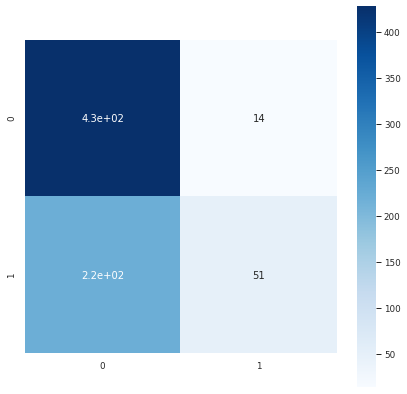

In [346]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

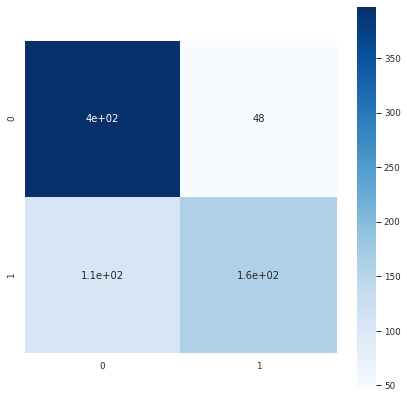

In [347]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

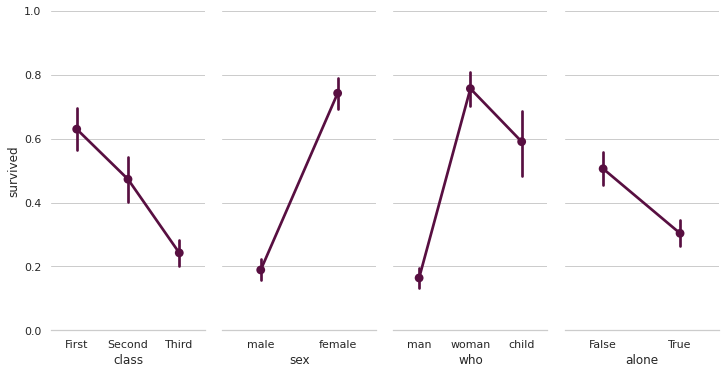

In [348]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

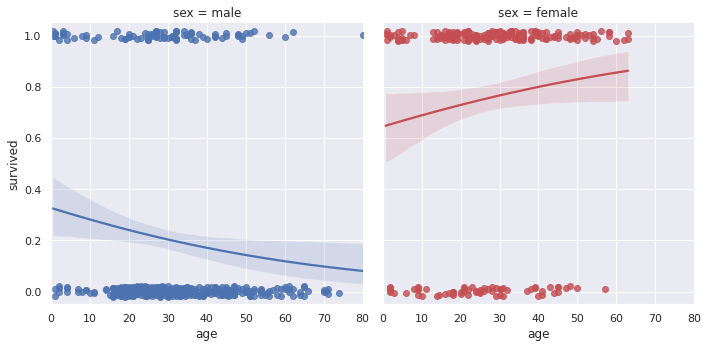

In [350]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="b", female="r")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

## 5.4 主成分分析

In [376]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [377]:
cancer_df = pd.read_csv('/content/drive/My Drive/Pythonライブラリ基礎講座/study_ai_ml/data/cancer.csv')

In [378]:
print('cancer of shape: {}'.format(cancer_df.shape))

cancer of shape: (569, 33)


In [379]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [380]:
cancer_df.info

<bound method DataFrame.info of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

In [381]:
# checking missing values -- looks good
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [382]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)

目的変数:　diagnosis(2列目)　M=悪性、B=良性　（ダイコトマス変数なので通常のロジスティック回帰モデルで分類）

説明変数：３列目以降

In [383]:
# 目的変数抽出して数値化
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0 )

In [384]:
# 説明変数　'radius_mean' を使用
X = cancer_df.loc[:, 'radius_mean':]

In [385]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [386]:
# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [388]:

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train score: 0.988

**Test score: 0.972** 検証スコア

Confustion matrix:

[[89  1]

 [ 3 50]]

Text(0, 0.5, 'variance ratio')

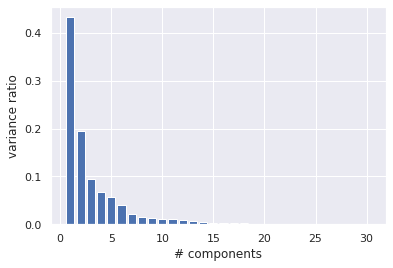

In [391]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_) +1)], pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('variance ratio')

第1～第２の主成分で6割以上の寄与率

In [393]:
# PCA
# reduce dim to 2

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))

X_train_pca shape: (426, 2)


In [394]:
#寄与率
print('explained variance ratio : {}'.format(pca.explained_variance_ratio_))

explained variance ratio : [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

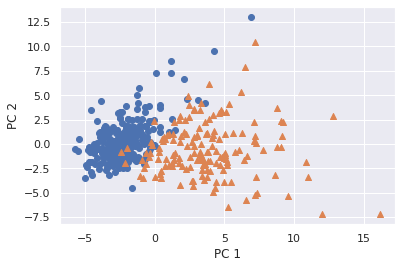

In [395]:
#散布図
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker = 'o')
plt.scatter(x=m[0], y=m[1], marker='^')
plt.xlabel('PC 1')
plt.ylabel('PC 2')